## Desafio KDD 2009

Nesse desafio a tarefa é, com base em um banco de dados com 50.000 contas bancárias predizer a proabilidade de um cliente:

 - Cancelar sua conta (churn),
 - Usar novos produtos e serviços (appetency)
 - Comprar upgrades ou adicionais a sua conta quando apresentado (up-selling)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# Conjunto de treinamento
train = pd.read_table('data/orange_small_train.data', sep='\t', header=0)
#salvando quais são as variaveis numericas e categoricas
num_cols = train.columns.tolist()[:190]
cat_cols = train.columns.tolist()[190:]
#targets
labels_appetency = pd.read_table('data/orange_small_train_appetency.labels', sep='\t', header=-1)
labels_upselling = pd.read_table('data/orange_small_train_upselling.labels', sep='\t', header=-1)
labels_churn = pd.read_table('data/orange_small_train_churn.labels', sep='\t', header=-1)


/home/leandro/Documents/Hekima/hekima/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/leandro/Documents/Hekima/hekima/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1.0 - Base de Dados

A versão small do banco de dados disponibilizado para esse desafio consiste em 230 informações sobre 50.000 contas bancárias. As primeiras 190 variáveis são numéricas (representam quantidade: ex. salário), enquanto as 40 restante são categoricas (representam qualidade ex. genero).

In [2]:
print('Tamanho da base:{}'.format(train.shape))

Tamanho da base:(50000, 230)


In [3]:
train.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,168.0,117625.60,NaN,NaN,NaN,NaN,NaN,1175.0,NaN,NaN,NaN,6.0,NaN,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,40.0,-356411.60,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675


#### Pelo que podemos ver temos dados ausentes, vamos ver quantos:



In [4]:
print("Número de observações em dataset com Nan: {} ".format(len(train[train.isnull().any(axis=1)])))
print('Porcetagem de dados ausentes por atribultos (%):')
((train.isnull().sum()/len(train))*100).sort_values(ascending=False)

Número de observações em dataset com Nan: 50000 
Porcetagem de dados ausentes por atribultos (%):


Var230    100.000
Var39     100.000
Var185    100.000
Var79     100.000
Var169    100.000
Var55     100.000
Var141    100.000
Var52     100.000
Var48     100.000
Var42     100.000
Var209    100.000
Var32     100.000
Var175    100.000
Var31     100.000
Var8      100.000
Var167    100.000
Var15     100.000
Var20     100.000
Var92      99.658
Var118     99.658
Var64      99.524
Var190     99.334
Var45      99.312
Var102     99.098
Var62      98.884
Var98      98.884
Var12      98.884
Var89      98.708
Var56      98.708
Var178     98.708
Var136     98.612
Var215     98.612
Var63      98.612
Var66      98.612
Var156     98.612
Var131     98.596
Var129     98.596
Var116     98.596
Var154     98.596
Var137     98.596
Var121     98.596
Var142     98.596
Var77      98.596
Var110     98.596
Var108     98.596
Var100     98.596
Var90      98.596
Var87      98.596
Var86      98.596
Var58      98.596
Var53      98.596
Var50      98.596
Var47      98.596
Var41      98.596
Var30      98.596
Var29     

#### Temos muitos dados ausentes por toda a base, infelizmente para não perdemos muitos registros será necessario descartar alguns atribultos. Atribultos com menos de 30% de ausentes talvez seja possivel recupera-los utilizando interpolação, nos numericos.

In [5]:
varsNA = train.isnull().sum() < int(50000*0.4)
varsNA = list(varsNA.index[varsNA==True])
print('Quantidade de variaveis validas: {}'.format(len(varsNA)))

Quantidade de variaveis validas: 67


In [6]:
train[varsNA].head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,36,35.0,1350864.0,0.0,7333.11,5.0,12.0,104.0,168.0,117625.60,1175.0,6.0,720.0,8.0,0.0,1212385.0,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,26,0.0,2872928.0,3.0,151098.90,25.0,2.0,40.0,40.0,-356411.60,590.0,72.0,0.0,NaN,8.0,4136430.0,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,130,518.0,1675776.0,0.0,16211.58,40.0,58.0,312.0,336.0,405104.00,3230.0,114.0,5967.0,-28.0,0.0,3478905.0,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,12,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,-275703.60,NaN,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,82,224.0,784448.0,0.0,37423.50,0.0,0.0,32.0,56.0,10714.84,215.0,0.0,15111.0,58.0,0.0,150650.0,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


#### Atualizando a lista das colunas numericas e categoricas

In [7]:
train = train[varsNA]
cat_cols = train.columns.tolist()[-28:]
num_cols = train.columns.tolist()[:-28]

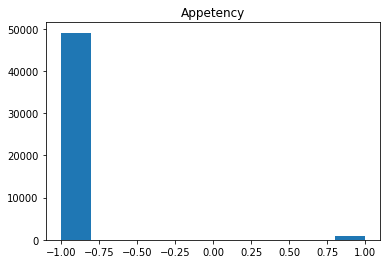

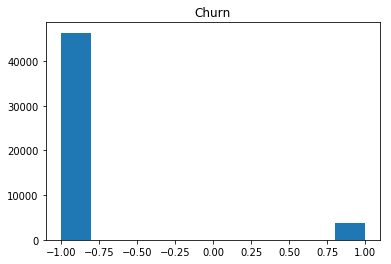

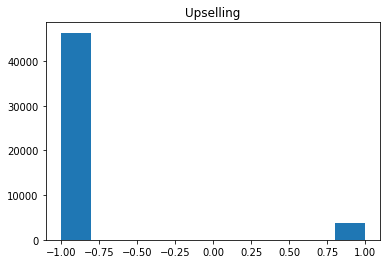

In [8]:
plt.hist(labels_appetency[0])
plt.title('Appetency')
plt.show()
plt.hist(labels_churn[0])
plt.title('Churn')
plt.show()
plt.hist(labels_upselling[0])
plt.title('Upselling')
plt.show()

#### Podemos ver que as variaveis objetivo estão debalanciadas, ou seja, não temos um equlibrio entre as opções da classificação, e isso pode afetar nosso modelo.

## 1.1 Enconder

As variaveis categoricas estão codificadas para manter o anonimato dos clientes do banco, mas muitos desses valores são padronizados, por isso vamos utilizar o LabelEncoder para passa-las para numerico de forma que o classificador possa utiliza-los

O LabelEncoder é um tipo de tranformação que se aplica sob os dados para converter as n categorias encontradas na série de instâncias em n-1 valores numéricos. Dessa forma, essa transformação mapeia cada um das N possiveis categorias (que, aqui incluem NaN como uma possibilidade) em um valor inteiro entre 0 e N-1.

In [9]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    train[col]=LabelEncoder().fit_transform(train[col].astype(str))

In [10]:
train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,36,35.0,1350864.0,0.0,7333.11,5.0,12.0,104.0,168.0,117625.60,1175.0,6.0,720.0,8.0,0.0,1212385.0,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0,225,25,22,0,177,3302,4015,3682,0,28,1,11,10,0,5,0,44,788,12237,1,11,94,4,2964,3,22,2,8
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,26,0.0,2872928.0,3.0,151098.90,25.0,2.0,40.0,40.0,-356411.60,590.0,72.0,0.0,NaN,8.0,4136430.0,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0,91,25,22,0,13,3697,4891,4422,0,79,3,21,10,0,5,0,33,1317,11249,2,11,10,4,125,0,14,2,8
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,130,518.0,1675776.0,0.0,16211.58,40.0,58.0,312.0,336.0,405104.00,3230.0,114.0,5967.0,-28.0,0.0,3478905.0,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0,248,5,22,0,157,1686,4901,448,0,37,1,11,5,0,5,0,42,1612,8473,0,11,1293,0,1610,3,10,0,25
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,12,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,-275703.60,NaN,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,269,25,22,0,203,2575,362,2953,0,57,1,16,10,0,5,1,33,1425,9161,0,11,1444,4,817,0,7,2,8
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,82,224.0,784448.0,0.0,37423.50,0.0,0.0,32.0,56.0,10714.84,215.0,0.0,15111.0,58.0,0.0,150650.0,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0,131,25,22,0,209,971,2399,5512,0,43,3,3,10,0,5,0,44,6,3834,0,11,1731,4,65,0,7,2,8


## 1.2 Imputer

Mesmo descartando colunas que tinham mais de 70% de dados ausentes continuamos com alguns dados faltantes em nossa base por isso irems utilizar o metodo imputer para "completar" nossos dados.

O metodo imputer recebe como parametros o valor que queremos substituir, o metodo que iremos utilizar para imputar um valor naquele registro. Iremos substituir valores NaN pelo valor mais frequente em cada coluna para os valores categoriso e para os numerios iremos utilizar a media

In [11]:
from sklearn.preprocessing import Imputer

imp_num = Imputer(missing_values=np.NAN,strategy='mean', axis=0)
#imp_cat = Imputer(missing_values=np.NAN,strategy='most_frequent', axis=0)
#train[cat_cols] = imp_cat.fit_transform(train[cat_cols])
train = imp_num.fit_transform(train)


### 1.3 Normalização dos dados

É uma pratica comum nos processos de aprendezado de maquina normalizar os dados para que fiquem padronizados em um intervalo, isso melhora os resultados de muitos algoritmos de machine learning.

Para esta normalização iremos utlizar o MinMaxScaler que converte os valores dos atributos para o intervalo [0,1] dividindo os valores pelo maior valor encontrado na transformação.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0,1])
train_norm = scaler.fit_transform(train)

### 1.4 Escolhendo os atribultos

 método de seleção de atributos que estima a importancia para cada atributo após o treino dos dados com classificadores fracos, sendo que o classificador "fraco" selecionado para essa tarefa é o SVC linear (Linear Support Vector Classification), que é o algoritmo de classificação que usa SVM (Support Vector Machines) com um kernel linear.

Esse classificador que é usado para predizer a importância dos atributos, estima uma linha que tenta otimizar a separação entre as instâncias positivas das negativas usando os valores do n-atributos. Assim, ele quantifica a importância de cada atributo segundo o erro que este atributo retorna considerando o valor esperado da predição. Nessas condições, quanto menor for o valor do hiper-parâmetro C (que é o hiper-parametro que restringe o erro máximo aceito para predição) menor será a quantidade de atributos que serão selecionados.

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
X=[]
for i,y in enumerate([labels_appetency,labels_churn,labels_upselling]):
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_norm, y[0].values)
    model = SelectFromModel(lsvc, prefit=True)
    X.append(model.transform(train))
    print(X[i].shape)


(50000, 6)
(50000, 12)
(50000, 17)


### 1.5 Desbalaciamento do objetivo
Como visto anteriormente existe diferença entre a quantidade de classes positivas e negativas na base de dados. Utilizando a técnica over-sampling podemos igualar a quantidade de instancias de cada classe.

A tecnica de over-sampling que iremos aplicar é denominada SMOTE (Synthetic Minority Over-sampling Technique) e consiste de identificar grupos de instancias similares e replicar seus atributos usando um regressor fraco.

In [14]:
from sklearn.model_selection import train_test_split

Y_train=[]
X_train=[]
Y_test=[]
X_test=[]
for i, y in enumerate([labels_appetency,labels_churn,labels_upselling]):
    xtrain, xtest, ytrain, ytest = train_test_split(X[i],y)
    X_train.append(xtrain)
    Y_train.append(ytrain)
    X_test.append(xtest)
    Y_test.append(ytest)

    

In [15]:
from imblearn.over_sampling import SMOTE
X_smote=[]
Y_smote=[]
for i,x,y in zip(range(3),X_train,Y_train):
    X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(x, y[0].values)
    X_smote.append(X_resampled)
    Y_smote.append(y_resampled)


## 2.0 Criando o modelo

Randomforest, que é um dos principais algoritmos de classificação, ele classifica os dados criando um conjunto de árvores de decisão e predizendo os valores de teste com base na combinação do resultado dessas árvores. Cada uma das árvores seleciona, aleatoriamente, uma quantidade de atributos e os ordena por aqueles que são propícios predição. A combinação dessas diferentes arvores que selecionam os atributos aleatoriamente tende resultar em boas predições, pois diminui a variancia final e tende a dar menos prioridade para atributos menos relevantes.


In [16]:
from sklearn.metrics import roc_auc_score #metrica de avaliação
from sklearn.ensemble import RandomForestClassifier#classificador
from sklearn.model_selection import GridSearchCV #turning de parametros
from sklearn.metrics import classification_report, confusion_matrix
params={'n_estimators':[100,200,300],'max_depth':[10,20,50]}
model=[]
for i, target in zip(range(3),['Appetency','Churn','Upseling']):
    clf = RandomForestClassifier(n_jobs=-1,random_state=42)
    grid = GridSearchCV(estimator= clf, param_grid=params, cv=10)
    grid.fit(X_smote[i],Y_smote[i])
    y_pred = grid.predict(X_smote[i])
    print('(Train) {} AUC SCORE: {}'.format(target,roc_auc_score(y_pred,Y_smote[i])))
    y_pred = grid.predict(X_test[i])
    print('(Test)  {} AUC SCORE: {}\nParametros: {}'.format(target,roc_auc_score(y_pred,Y_test[i]),grid.best_params_))

/home/leandro/Documents/Hekima/hekima/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(Train) Appetency AUC SCORE: 0.9996197614949163
(Test)  Appetency AUC SCORE: 0.5131735688824451
Parametros: {'max_depth': 50, 'n_estimators': 200}
(Train) Churn AUC SCORE: 1.0
(Test)  Churn AUC SCORE: 0.5881831852566962
Parametros: {'max_depth': 50, 'n_estimators': 300}
(Train) Upseling AUC SCORE: 0.9999568593615186
(Test)  Upseling AUC SCORE: 0.8349003157002869
Parametros: {'max_depth': 50, 'n_estimators': 100}
